### Chapter 6.4
# GI/GI/1 Waiting Time Distribution
---
>(c) Tobias Hossfeld  (Aug 2021)<br><br>
> This script and the figures are part of the following book. The book is to be cited whenever the script is used (copyright CC BY-SA 4.0):<br>
> *Tran-Gia, P. & Hossfeld, T. (2021). 
Performance Modeling and Analysis of Communication Networks - A Lecture Note.
Würzburg University Press.*
> *https://doi.org/10.25972/WUP-978-3-95826-153-2*

---

The interarrival time $A$ and the service time $B$ can be arbitrarily distributed:

$ \displaystyle
 a(k) = P (A = k \cdot \Delta t) \quad k=0,1, \dots\;,\\
 b(k) = P (B = k \cdot \Delta t) \quad k=0,1, \dots\;.
$

Assume both interarrival and service times to be non-negative. The offered traffic is identical to the system occupancy or server utilization:

$ \displaystyle
   \rho   = \frac{E[B]}{E[A]}  < 1
$

System utilization: rho=0.90


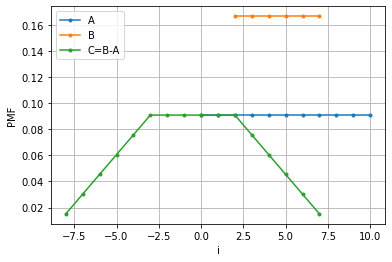

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from discreteTimeAnalysis import *
import math

A = DU(0,10) # interarrival time
B = DU(2,7) # service time

rho = B.mean()/A.mean()
print(f'System utilization: rho={rho:.2f}')

A.plotPMF(label='A');
B.plotPMF(label='B');
C = B-A
C.plotPMF(label='C=B-A');
plt.xlabel('i')
plt.ylabel('PMF')
plt.grid(which='major')
plt.legend();

## Waiting Time Distribution: Power Method
By means of the power method, we iteratively compute the waiting time distribution, until the distribution $W$ reaches the steady state.

$ \displaystyle
  w_{n+1} (k) = \pi_0 \Big(w_n (k)  * b_n (k) * a_n (-k)\Big)
          =  \pi_0 \Big(w_n (k) * c_n (k)\Big)
$

The waiting time distribution of the $(n+1)$-st customer can be successively calculated from the waiting time distribution of the $n$-th customer. The interarrival and service time distributions can be chosen in a customer-dependent manner.
This leads to an iterative algorithm for calculating the waiting time distribution of the GI/GI/1 system in time domain. 

This can be expressed in terms of random variables:

$ \displaystyle
W_{n+1} = \max(W_n+C,0) \quad \text{with } \; C = B-A
$


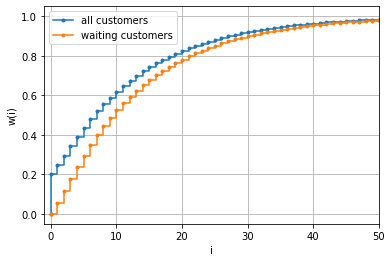

In [33]:
Wn1 = DET(0) # empty system
Wn = DET(1)  # just for initialization

# power method
while Wn != Wn1: # comparison based on means of the distributions
    Wn = Wn1
    Wn1 = max( Wn+C ,0)

Wn1.plotCDF(label='all customers')

condition = lambda i: i>0
W_waiting = Wn1 | condition # conditional r.v. of waiting customers
W_waiting.plotCDF(label='waiting customers')

plt.grid(which='major')
plt.xlim([-1, 50])
plt.xlabel('i')
plt.ylabel('w(i)')
plt.legend();

## Example from Chapter 6.4.6
In many applications of time-discrete analysis, distributions are obtained from measurements and given in the form of histograms. The following distributions for interarrival and service times are considered to illustrate the use of the algorithm:

$a(4)=0.4$,  $a(8)=0.5$,  $a(20)=0.1$,  $a(k) = 0$  otherwise,

$b(4)=0.2$,  $b(5)=0.1$,  $b(6)=0.7$,   $b(k) = 0$  otherwise.

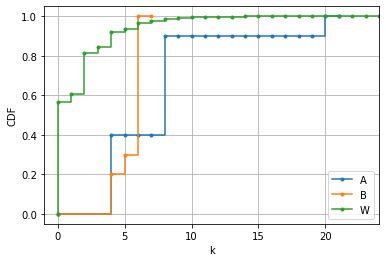

In [37]:
A = DiscreteDistribution([4,8,20],[0.4,0.5,0.1])
B = DiscreteDistribution([4,5,6],[0.2,0.1,0.7])
C = B-A


Wn1 = DET(0) # empty system
Wn = DET(1)  # just for initialization

# power method
while Wn != Wn1: # comparison based on means of the distributions
    Wn = Wn1
    Wn1 = max( Wn+C ,0)
    
A.plotCDF(label='A')
B.plotCDF(label='B')
Wn1.plotCDF(label='W')
plt.xlabel('k')
plt.ylabel('CDF')
plt.grid(which='major')
plt.xlim([-1, 24])
plt.legend();

## Trivial Situation
Please note the following trivial situation: If the interarrival time is always larger than the maximum service time, customers never have to wait in the steady state.

System utilization: rho=0.26


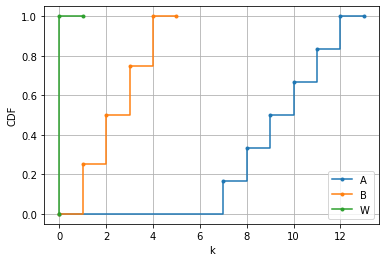

In [44]:
A = DU(7,12)
B = DU(1,4)
C = B-A

rho = B.mean()/A.mean()
print(f'System utilization: rho={rho:.2f}')


Wn1 = DET(0) # empty system
Wn = DET(1)  # just for initialization

# power method
while Wn != Wn1: # comparison based on means of the distributions
    Wn = Wn1
    Wn1 = max( Wn+C ,0)
    
A.plotCDF(label='A')
B.plotCDF(label='B')
Wn1.plotCDF(label='W')
plt.xlabel('k')
plt.ylabel('CDF')
plt.grid(which='major')
plt.legend();